# Backpropagation Lab





## 1 Avoiding Overfit: Early Stopping and Loss Regularization

### 1.1 (10%) No overfit avoidance
Train the sklearn [MLP classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff).  Use 3 output nodes (1 per class). Expanding the one output variable into 3 is called one-hot encoding or dummy variable encoding. There are lots of ways to implement this including the Pandas get_dummies method. This experiment is set up to run a little longer to better see the effects of overfit.  Be patient as there are lots of hidden nodes and a high max iterations setting.

Use default parameters except for the following:
- hidden_layer_sizes = [64] - One hidden layer with 64 hidden nodes
- activation = 'logistic'
- solver = 'sgd'
- alpha = 0
- batch_size = 1
- learning_rate_init = 0.01
- shuffle = True
- momentum = 0
- n_iter_no_change = 50
- max_iterations = 10000

Use a random 80/20 split of the data.  Run it a few times with different random training/test splits and give average values for
- Number of iterations until convergence
- Training set accuracy
- Test set accuracy
For one run observe the softmax probabilities on the test set using clf.predict_proba

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
import time
from scipy.io import arff
import io
import requests

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

x = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = pd.get_dummies(df["species"])

clf = MLPClassifier(hidden_layer_sizes=[64], # num of nuerons in hidden layer (e.g 1 hidden layer of 64 hu)
                    activation='logistic', # sigmoid activation layer
                    solver='sgd', # solver for weight optimization (stochastic gradient descent)
                    alpha=0, # Strength of L2 regularization term
                    batch_size=1, # size of mini batches
                    learning_rate_init=0.01, # lr
                    shuffle=True, # shuffle samples at each iter (only used when solver is "sgd" or "adam")
                    momentum=0, # p for gradient descent (only used when solver is "sgd")
                    n_iter_no_change=50, # If the validation loss does not improve for 50 epochs then training stops early
                    max_iter=10000) # epochs

results = []
num_of_runs = 5

start_time = time.time()

for i in range(num_of_runs):
  train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

  clf.fit(train_x, train_y)

  if i == 0:
      probabilities = clf.predict_proba(test_x)[:5]
      for row in probabilities:
        print(f"Setosa: {row[0]:.4f}, Versicolor: {row[1]:.4f}, Virginica: {row[2]:.4f}")

  iterations = clf.n_iter_

  train_accuracy = clf.score(train_x, train_y)
  test_accuracy = clf.score(test_x, test_y)

  results.append([iterations, train_accuracy, test_accuracy])

end_time = time.time()

all_iterations = [result[0] for result in results]
all_train_acc = [result[1] for result in results]
all_test_acc = [result[2] for result in results]

avg_iterations = sum(all_iterations) / len(all_iterations)
avg_train_acc = sum(all_train_acc) / len(all_train_acc)
avg_test_acc = sum(all_test_acc) / len(all_test_acc)

print("Time taken:", end_time - start_time)
print("Average Iterations:", avg_iterations)
print("Average Train Accuracy:", avg_train_acc)
print("Average Test Accuracy:", avg_test_acc)


Setosa: 0.9994, Versicolor: 0.0014, Virginica: 0.0000
Setosa: 0.0000, Versicolor: 0.0179, Virginica: 0.9921
Setosa: 0.9980, Versicolor: 0.0042, Virginica: 0.0000
Setosa: 0.0000, Versicolor: 0.0018, Virginica: 0.9997
Setosa: 0.0002, Versicolor: 0.9448, Virginica: 0.0115
Time taken: 55.202441692352295
Average Iterations: 341.6
Average Train Accuracy: 0.975
Average Test Accuracy: 0.9666666666666668


#### Discussion
In the markdown cell below, write about your experience training the MLP classifier. Things to cover in your discussion: How long did it take? What was your accuracy on the training set? What was your accuracy on the testing set? Do you see any evidence of overfitting? If so, what could be done to reduce the effects of overfitting?

This took me 63 seconds. The accuracy of **training set** was 98%. The accuracy of the **testing set** was 95%. Though it did fit pretty decently, I do see some signs of overfitting since the training data was higher than the testing data.

Some things that we can do to reduce the overfitting is: use the `early_stopping` attribute in the `MLPClassifier`. We could also increase the `alpha` term so that we increase L2 regularization term. We could also decrease the number of hidden neurons from 64 to a smaller value can prevent the network from memorizing the training data.:

### 1.2 (10%) Early Stopping (Validation Set)

- Do the same as above but this time with early stopping
- Use a validation set taken from the training set for your stopping criteria. Using 10-15% of the training set for a validation set is common. You do this simply by setting the MLPClassifier early_stopping, validation_fraction, and n_iter_no_change parameters.
- Run it a few times with different training/test splits and give average values for
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best validation score (MLPClassifer attribute best_validation_score_)
- For one run create a graph with validation set accuracy (*y*-axis) vs epochs (*x*-axis). Hint: MLPClassifer attribute validation_scores_

Note: Due to the simplicity of and lack of noise in the iris data set you will not see the accuracy improvements that early stopping or loss regularization can give for more complex noisy datasets.  In particular, early stopping will have lower than expected results because with a very small VS taken from a very small training set there is less data to train on and more variance with the VS score.  Thus, you will probably get lower accuracies for VS than normal training for this less typical case.  But at least you will get practice on using early stopping and loss regularization for future data sets.

Setosa: 0.9955, Versicolor: 0.0883, Virginica: 0.0000
Setosa: 0.9864, Versicolor: 0.1573, Virginica: 0.0000
Setosa: 0.9871, Versicolor: 0.1414, Virginica: 0.0000
Setosa: 0.0073, Versicolor: 0.6909, Virginica: 0.0552
Setosa: 0.0004, Versicolor: 0.3684, Virginica: 0.8274
Best Validation Score of 0th run  1.0
Best Validation Score of 1th run  1.0
Best Validation Score of 2th run  1.0
Best Validation Score of 3th run  1.0
Best Validation Score of 4th run  1.0
Time taken: 15.446100950241089
Average Iterations: 121.2
Average Train Accuracy: 0.9400000000000001
Average Test Accuracy: 0.9333333333333333
Average Validation Score: 1.0


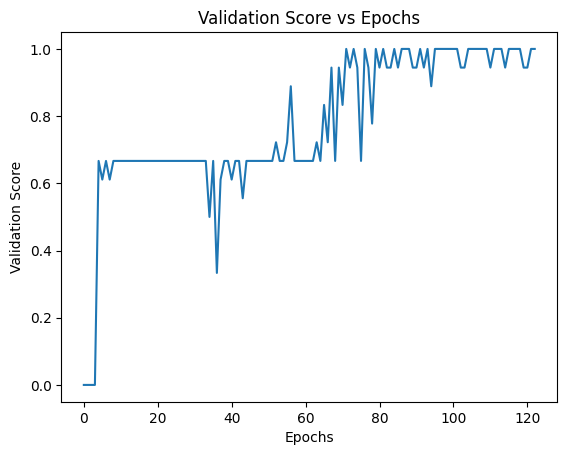

In [ ]:
#Iris with early stopping and validation scores graph

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

x = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = pd.get_dummies(df["species"])

clf = MLPClassifier(hidden_layer_sizes=[64], # num of nuerons in hidden layer (e.g 1 hidden layer of 64 hu)
                    activation='logistic', # sigmoid activation layer
                    solver='sgd', # solver for weight optimization (stochastic gradient descent)
                    alpha=0, # Strength of L2 regularization term
                    batch_size=1, # size of mini batches
                    learning_rate_init=0.01, # lr
                    shuffle=True, # shuffle samples at each iter (only used when solver is "sgd" or "adam")
                    momentum=0, # p for gradient descent (only used when solver is "sgd")
                    n_iter_no_change=50, # If the validation loss does not improve for 50 epochs then training stops early
                    max_iter=10000, # epochs
                    early_stopping=True, # to prevent overfit
                    validation_fraction=0.15 # The proportion of training data to set aside as validation set for early stopping.
                    )

results = []
num_of_runs = 5

start_time = time.time()

for i in range(num_of_runs):
  train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

  clf.fit(train_x, train_y)

  if i == 0:
      probabilities = clf.predict_proba(test_x)[:5]
      for row in probabilities:
        print(f"Setosa: {row[0]:.4f}, Versicolor: {row[1]:.4f}, Virginica: {row[2]:.4f}")

  iterations = clf.n_iter_

  train_accuracy = clf.score(train_x, train_y)
  test_accuracy = clf.score(test_x, test_y)

  best_validation_score = clf.best_validation_score_
  print(f"Best Validation Score of {i}th run ", best_validation_score)

  results.append([iterations, train_accuracy, test_accuracy, best_validation_score ])

end_time = time.time()

all_iterations = [result[0] for result in results]
all_train_acc = [result[1] for result in results]
all_test_acc = [result[2] for result in results]
all_validation_scores = [result[3] for result in results]

avg_iterations = sum(all_iterations) / len(all_iterations)
avg_train_acc = sum(all_train_acc) / len(all_train_acc)
avg_test_acc = sum(all_test_acc) / len(all_test_acc)
avg_validation_scores = sum(all_validation_scores) / len(all_validation_scores)

print("Time taken:", end_time - start_time)
print("Average Iterations:", avg_iterations)
print("Average Train Accuracy:", avg_train_acc)
print("Average Test Accuracy:", avg_test_acc)
print("Average Validation Score:", avg_validation_scores)


plt.title("Validation Score vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Validation Score")
plt.plot(clf.validation_scores_)
plt.show()


#### Discussion
Report on the average number of iterations until convergence. What is the effect of the use of the validation set and early stopping on training set accuracy and testing set accuracy? What do you attribute the performance change to? What do you see in the validation scores graph?

There were 121 iterations until convergence. Well in my case (and as outlined above) my training set accuracy dropped to 94% and testing set accuracy dropped to 93%. It is still good that my training set accuracy and testing set accuracy are close together. for example of training set was very high, but testing set accuracy was signifcantly lower, that would be signs of overfitting.

The validation accuracy was at 1.0, which is unexpected... This could mean that the validation set was too small or too easy, which by the looks of the data, seems to be the case.

The good thing is that the model trained signficantly faster, with only a few percentage points off the accuracy.

Looking at the graph, the model improves dramatically from 0-10 epochs, so that model is learning very quickly. The spikes in the data also could mean that the validation set is too small... I believe that if we increase the data, we should have fewer sudden spikes.

### 1.3 (10%) Loss Regularization

- Do the same as in 1.1 but his time with loss regularization (Do not do early stopping)
- Run it with different L2 regularization parameter values (alpha).  The default for alpha is .0001.  Try other values such as .1, .01, .001, .00001, etc. Make a table with each row including:
    - The regularization parameter value
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best loss value (MLPClassifer attribute best_loss_)
- Which regularization value gave you the best results?
- For your best regularization value do one run and create a graph with loss (*y*-axis) vs epochs (*x*-axis) for the training set (Hint: MLPClassifer attribute loss_curve_)

Alpha: 0.1 Test
Setosa: 0.0670, Versicolor: 0.3814, Virginica: 0.6538
Setosa: 0.6775, Versicolor: 0.1913, Virginica: 0.1304
Setosa: 0.7121, Versicolor: 0.1845, Virginica: 0.1172
Setosa: 0.1089, Versicolor: 0.3466, Virginica: 0.5589
Setosa: 0.1977, Versicolor: 0.3030, Virginica: 0.4281
Run 1: Best Loss = 1.6568591464977769
Run 2: Best Loss = 1.6513945725867178
Run 3: Best Loss = 1.611531738547999
Run 4: Best Loss = 1.6336980329353021
Run 5: Best Loss = 1.64798675688232

FINAL RESULTS FOR ALPHA = 0.1
Time Taken: 21.500301122665405
Avg Iterations: 143.0
Avg Train Accuracy: 0.57
Avg Test Accuracy: 0.5933333333333334
Avg Best Loss: 1.640294049490023
-------------------------------------------------------
Alpha: 0.01 Test
Setosa: 0.9795, Versicolor: 0.0490, Virginica: 0.0001
Setosa: 0.0673, Versicolor: 0.7779, Virginica: 0.0270
Setosa: 0.9527, Versicolor: 0.0970, Virginica: 0.0002
Setosa: 0.0024, Versicolor: 0.1971, Virginica: 0.9011
Setosa: 0.0075, Versicolor: 0.4501, Virginica: 0.5257
Run 

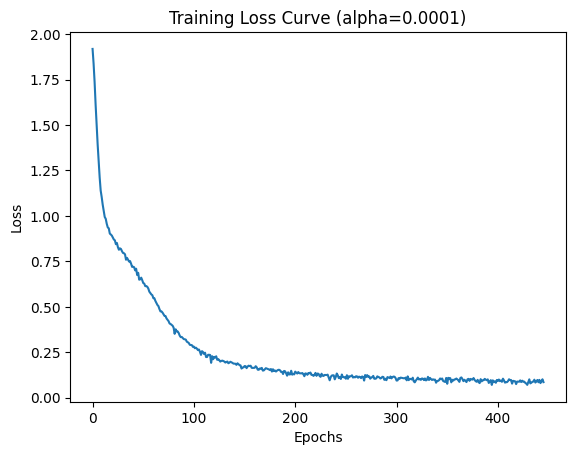

In [ ]:
#Iris with Loss Regularization

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

x = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = pd.get_dummies(df["species"])


results = []
alpha_values = [0.1, 0.01, 0.001, 0.0001, 0.00001]
num_of_runs = 5

for alpha in alpha_values:
  start_time = time.time()
  run_results = []

  print(f"Alpha: {alpha} Test")

  for i in range(num_of_runs):
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

    clf = MLPClassifier(hidden_layer_sizes=[64],
                        activation='logistic',
                        solver='sgd',
                        alpha=alpha,
                        batch_size=1,
                        learning_rate_init=0.01,
                        shuffle=True,
                        momentum=0,
                        n_iter_no_change=50,
                        max_iter=10000
                        )

    clf.fit(train_x, train_y)

    if i == 0:
        probabilities = clf.predict_proba(test_x)[:5]
        for row in probabilities:
          print(f"Setosa: {row[0]:.4f}, Versicolor: {row[1]:.4f}, Virginica: {row[2]:.4f}")

    iterations = clf.n_iter_
    train_accuracy = clf.score(train_x, train_y)
    test_accuracy = clf.score(test_x, test_y)
    best_loss_value = clf.best_loss_

    print(f"Run {i + 1}: Best Loss = {best_loss_value}")

    run_results.append([iterations, train_accuracy, test_accuracy, best_loss_value ])

  end_time = time.time()

  avg_iterations = np.mean([run_result[0] for run_result in run_results])
  avg_train_acc = np.mean([run_result[1] for run_result in run_results])
  avg_test_acc = np.mean([run_result[2] for run_result in run_results])
  avg_loss_values = np.mean([run_result[3] for run_result in run_results])

  results.append([alpha, avg_iterations, avg_train_acc, avg_test_acc, avg_loss_values])

  print(f"\nFINAL RESULTS FOR ALPHA = {alpha}")
  print(f"Time Taken: {end_time - start_time}")
  print(f"Avg Iterations: {avg_iterations}")
  print(f"Avg Train Accuracy: {avg_train_acc}")
  print(f"Avg Test Accuracy: {avg_test_acc}")
  print(f"Avg Best Loss: {avg_loss_values:}")
  print("-------------------------------------------------------")

print("Done")


df_results = pd.DataFrame(results, columns=["Alpha", "Avg Iterations", "Avg Train Acc", "Avg Test Acc", "Avg Best Loss"])
print(df_results.to_string(index=False))

best_alpha = df_results.loc[df_results["Avg Test Acc"].idxmax(), "Alpha"]
print(f"\n Best Regularization Value (Alpha): {best_alpha}")
print(f"Train with the best alpha\n")

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

clf = MLPClassifier(hidden_layer_sizes=[64],
                    activation='logistic',
                    solver='sgd',
                    alpha=best_alpha,
                    batch_size=1,
                    learning_rate_init=0.01,
                    shuffle=True,
                    momentum=0,
                    n_iter_no_change=50,
                    max_iter=10000
                    )

clf.fit(train_x, train_y)

plt.title(f"Training Loss Curve (alpha={best_alpha})")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(clf.loss_curve_)
plt.show()

#### Discussion
Write about which regularization method gave you the best results and why you think that happened. Also compare: no regularization, early stopping, and L2 loss regularization.

The 0.0001 alpha value for our regaularization gave me the best consistent results. The avg of the best loss function was 13% which was really low and had amazing test and training set accruacy both hovering at 97%.

The worst by far was the 0.1 which means that there were stronger penalties to weights, which reduced overfitting lowered training accuracy quite dramatically.

The 0.0001 alpha value, as compared with the no regularization had better test accuracy (a little better due to no overfitting). And the 0.0001 alpha value had overall higher accuracies in both training and testing sets as compared to early stopping.

## 2 Hyperparameters
In this section we use the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff) to consider the hyperparameters of learning rate, number of hidden nodes, and momentum.

### 2.1 (10%) Vowel Dataset Questions
- Give the baseline accuracies for the Iris and Vowel datasets. Baseline accuracy is what you would get if the model just outputs the majority class of the data set (i.e. the output value which occurs most often). These two data sets are not great examples for this as they have an equal amount of each class, which is not typical.
- Discuss why the vowel data set will probably have lower accuracy than Iris.
- Consider which of the vowel dataset's input features you should not use in training and discuss why.

1. Iris dataset baseline accuracy is 1/3 (33%). This is because we have 3 classes and it the data is distributed evenly. The Vowel data set basline accuracy is about 1/11 (9%).  Baseline accuracy is significantly lower for the vowel dataset.
2. The vowel dataset will have less accuracy because of the many more classes, which means it is more complex. The vowel dataset x values are continuous values derived from speech signals which is harder to seperate than the classification in the Iris dataset. Also acoustic data can be kinda noisy.
3. We probably can/should get rid of { Train, Test} column because the model could decifer train and test rather than learning the actual pronounciation. We can get rid of speaker number because the model could memorize the way a speaker talks rather than generalizing. We can also get rid of the sex column because we want the model to classify vowels independently of the speaker's gender.

### 2.2 (10%) Learning Rate
Load the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff). Drop any features which you explained above as being inappropriate for training.

Hints: Consider the Pandas drop method for dropping columns. When you want to transform features in your data set there are lots of approaches. You could edit the arff file directly, or make the transforms in your code.  The Pandas replace method is nice for that. For example, if you wanted to change the vowel data set gender feature in a Pandas dataframe to 0/1 you could do the following:

vowel_df['Sex'] = vowel_df['Sex'].str.decode('utf-8')   //Changes the byte code data into a normal string, b'Male' becomes "Male"\
vowel_df = vowel_df.replace('Male', 0)\
vowel_df = vowel_df.replace('Female', 1)

- Use one layer of hidden nodes with the number of hidden nodes being twice the number of inputs.
- Use a random 75/25 split of the data for the training/test set.
- Do not use early stopping.
- Try at least 5 different learning rates (LR) from very small (e.g. .001) to pretty big (e.g. 10). Each LR will require a different number of epochs to learn. LR effects both accuracy and time required for learning.
- Create a table which includes a row for each LR.  Your table columns should be LR, # epochs to learn the model, final training set accuracy and final test set accuracy.  As learning rates get smaller, it usually takes more epochs to learn. If your model is stopping learning too soon (converging) by hitting max_iterations (in this case and in experiments below), then you need to increase your max_iterations parameter in order to give your model more learning time.  To keep things faster, you don't need to increase max_iter past 1000 if you don't want to, but point out when more iterations may have given improvement.

In real testing one averages the results of multiple trials per LR (and other parameters) with different intitial conditions (training/test split, initial weights, etc.). That gives more accurate results but is not required for this lab.

Learning Rate: 0.001 Test


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Run # 1: Epochs = 1000, Train Acc = 0.25067385444743934, Test Acc = 0.23790322580645162


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Run # 2: Epochs = 1000, Train Acc = 0.35714285714285715, Test Acc = 0.3346774193548387


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Run # 3: Epochs = 1000, Train Acc = 0.24528301886792453, Test Acc = 0.21370967741935484


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Run # 4: Epochs = 1000, Train Acc = 0.3706199460916442, Test Acc = 0.31048387096774194


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Run # 5: Epochs = 1000, Train Acc = 0.24528301886792453, Test Acc = 0.15725806451612903

FINAL RESULTS FOR LEARNING RATE = 0.001
Time Taken: 40.81415319442749
Avg Iterations: 1000.0
Avg Train Accuracy: 0.29380053908355797
Avg Test Accuracy: 0.2508064516129032
-------------------------------------------------------
Learning Rate: 0.01 Test


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Run # 1: Epochs = 1000, Train Acc = 0.6132075471698113, Test Acc = 0.5564516129032258


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Run # 2: Epochs = 1000, Train Acc = 0.6455525606469003, Test Acc = 0.5887096774193549


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Run # 3: Epochs = 1000, Train Acc = 0.6226415094339622, Test Acc = 0.5604838709677419


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Run # 4: Epochs = 1000, Train Acc = 0.6199460916442049, Test Acc = 0.6008064516129032


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Run # 5: Epochs = 1000, Train Acc = 0.6091644204851752, Test Acc = 0.5806451612903226

FINAL RESULTS FOR LEARNING RATE = 0.01
Time Taken: 34.52142524719238
Avg Iterations: 1000.0
Avg Train Accuracy: 0.6221024258760108
Avg Test Accuracy: 0.5774193548387097
-------------------------------------------------------
Learning Rate: 0.1 Test


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Run # 1: Epochs = 1000, Train Acc = 0.9460916442048517, Test Acc = 0.9193548387096774


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Run # 2: Epochs = 1000, Train Acc = 0.9514824797843666, Test Acc = 0.8870967741935484


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Run # 3: Epochs = 1000, Train Acc = 0.9501347708894878, Test Acc = 0.8387096774193549


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Run # 4: Epochs = 1000, Train Acc = 0.9568733153638814, Test Acc = 0.8588709677419355


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Run # 5: Epochs = 1000, Train Acc = 0.9393530997304582, Test Acc = 0.8870967741935484

FINAL RESULTS FOR LEARNING RATE = 0.1
Time Taken: 34.40822649002075
Avg Iterations: 1000.0
Avg Train Accuracy: 0.9487870619946092
Avg Test Accuracy: 0.8782258064516129
-------------------------------------------------------
Learning Rate: 1 Test


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Run # 1: Epochs = 1000, Train Acc = 1.0, Test Acc = 0.9516129032258065


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Run # 2: Epochs = 1000, Train Acc = 1.0, Test Acc = 0.9274193548387096


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Run # 3: Epochs = 1000, Train Acc = 1.0, Test Acc = 0.8911290322580645


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Run # 4: Epochs = 1000, Train Acc = 1.0, Test Acc = 0.9233870967741935
Run # 5: Epochs = 707, Train Acc = 0.9986522911051213, Test Acc = 0.9314516129032258

FINAL RESULTS FOR LEARNING RATE = 1
Time Taken: 33.351746797561646
Avg Iterations: 941.4
Avg Train Accuracy: 0.9997304582210242
Avg Test Accuracy: 0.925
-------------------------------------------------------
Learning Rate: 10 Test
Run # 1: Epochs = 310, Train Acc = 0.3221024258760108, Test Acc = 0.3346774193548387
Run # 2: Epochs = 228, Train Acc = 0.3423180592991914, Test Acc = 0.3185483870967742
Run # 3: Epochs = 162, Train Acc = 0.1967654986522911, Test Acc = 0.17338709677419356
Run # 4: Epochs = 131, Train Acc = 0.36792452830188677, Test Acc = 0.35080645161290325
Run # 5: Epochs = 158, Train Acc = 0.23450134770889489, Test Acc = 0.25

FINAL RESULTS FOR LEARNING RATE = 10
Time Taken: 6.1401543617248535
Avg Iterations: 197.8
Avg Train Accuracy: 0.292722371967655
Avg Test Accuracy: 0.28548387096774197
----------------------------

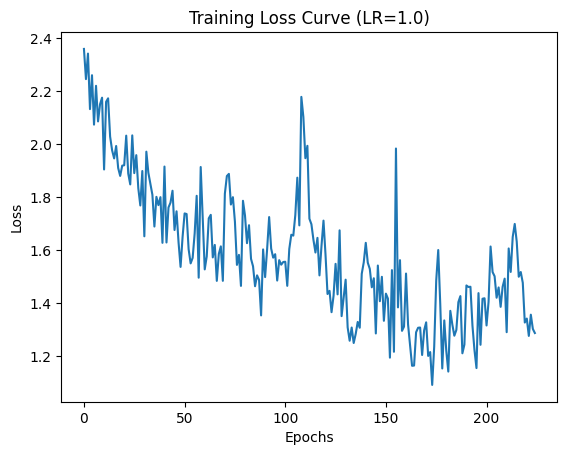

In [3]:
# Train with different learning rates
response = requests.get('https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff')
arff_data, meta = arff.loadarff(io.StringIO(response.text))

df = pd.DataFrame(arff_data)

df["Class"] = df["Class"].str.decode("utf-8")

df = df.drop(["Train or Test", "Speaker Number", "Sex"], axis=1)

x = df.drop(columns=["Class"])
y = df["Class"]

learning_rates = [0.001, 0.01, 0.1, 1, 10]
num_hidden_nodes = x.shape[1] * 2
num_of_runs = 5
results = []

for learning_rate in learning_rates:
  start_time = time.time()
  run_results = []

  print(f"Learning Rate: {learning_rate} Test")

  for i in range(num_of_runs):
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25)

    clf = MLPClassifier(hidden_layer_sizes=[num_hidden_nodes],
                        activation='logistic',
                        solver='sgd',
                        alpha=0,
                        batch_size=32,
                        learning_rate_init=learning_rate,
                        shuffle=True,
                        momentum=0,
                        n_iter_no_change=50,
                        max_iter=1000
                        )

    clf.fit(train_x, train_y)

    iterations = clf.n_iter_
    train_accuracy = clf.score(train_x, train_y)
    test_accuracy = clf.score(test_x, test_y)

    print(f"Run # {i + 1}: Epochs = {iterations}, Train Acc = {train_accuracy}, Test Acc = {test_accuracy}")

    run_results.append([iterations, train_accuracy, test_accuracy])

  end_time = time.time()

  avg_iterations = np.mean([r[0] for r in run_results])
  avg_train_acc = np.mean([r[1] for r in run_results])
  avg_test_acc = np.mean([r[2] for r in run_results])

  results.append([learning_rate, avg_iterations, avg_train_acc, avg_test_acc])

  print(f"\nFINAL RESULTS FOR LEARNING RATE = {learning_rate}")
  print(f"Time Taken: {end_time - start_time}")
  print(f"Avg Iterations: {avg_iterations}")
  print(f"Avg Train Accuracy: {avg_train_acc}")
  print(f"Avg Test Accuracy: {avg_test_acc}")
  print("-------------------------------------------------------")

print("Done")

df_results = pd.DataFrame(results, columns=["Learning Rate", "Avg Iterations", "Avg Train Acc", "Avg Test Acc"])

print(df_results.to_string(index=False))

best_lr = df_results.loc[df_results["Avg Test Acc"].idxmax(), "Learning Rate"]
print(f"\n Best Learning Rate: {best_lr:.6f}")

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25)

clf = MLPClassifier(
    hidden_layer_sizes=[num_hidden_nodes],
    activation='logistic',
    solver='sgd',
    alpha=0,
    batch_size=1,
    learning_rate_init=best_lr,
    shuffle=True,
    momentum=0,
    n_iter_no_change=50,
    max_iter=1000
)

clf.fit(train_x, train_y)

plt.plot(clf.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"Training Loss Curve (LR={best_lr})")
plt.show()



#### Discussion
Discuss your table and the effect of different learning rates on both training time and accuracy



NOTE FOR THE TA: I did up the batch_size (and made sure to be consistent in all parts of quesion #2) I found that it took way to long to run it with only a batch_size of 1.

The really small learning rates (0.001 and 0.01) required all 1000 iterations and still had terrible accuracy. 0.1 had better accuracy, but still needed the full training time. The best accuracy was the 1.0 learning rate which was able to converge in 941 iterations and with the highest test accuracy of 92.5 %. The larger learning rate of 10 caused significantly terrible accuracy(28.5%), so the best learning rate was 1.0.

### 2.3 (10%) Number of Hidden Nodes

Using the best LR you discovered, experiment with different numbers of hidden nodes.

- Start with 1 hidden node, then 2, and then double them for each test until you get no more improvement in accuracy.
- Create a table just like above, except with # of hidden nodes rather than LR.

In general, whenever you are testing a parameter such as # of hidden nodes, keep testing values until no more improvement is found. For example, if 20 hidden nodes did better than 10, you would not stop at 20, but would try 40, etc., until you no longer got improvement.


Running Tests for Hidden Nodes = 1
--------------------------------------------------
Run # 1: Epochs = 226, Train Acc = 0.2587601078167116, Test Acc = 0.2661290322580645
Run # 2: Epochs = 269, Train Acc = 0.20080862533692723, Test Acc = 0.16532258064516128
Run # 3: Epochs = 293, Train Acc = 0.16846361185983827, Test Acc = 0.15725806451612903
Run # 4: Epochs = 350, Train Acc = 0.2722371967654987, Test Acc = 0.24193548387096775
Run # 5: Epochs = 238, Train Acc = 0.1347708894878706, Test Acc = 0.1532258064516129

FINAL RESULTS FOR HIDDEN NODES = 1
Time Taken: 10.620593786239624
Avg Iterations: 275.2
Avg Train Accuracy: 0.20700808625336925
Avg Test Accuracy: 0.19677419354838707
-------------------------------------------------------

Running Tests for Hidden Nodes = 2
--------------------------------------------------
Run # 1: Epochs = 254, Train Acc = 0.49595687331536387, Test Acc = 0.4959677419354839
Run # 2: Epochs = 402, Train Acc = 0.39892183288409705, Test Acc = 0.3588709677419355


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Run # 2: Epochs = 1000, Train Acc = 1.0, Test Acc = 0.9233870967741935


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Run # 3: Epochs = 1000, Train Acc = 1.0, Test Acc = 0.9475806451612904


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Run # 4: Epochs = 1000, Train Acc = 0.9973045822102425, Test Acc = 0.9032258064516129


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Run # 5: Epochs = 1000, Train Acc = 1.0, Test Acc = 0.8790322580645161

FINAL RESULTS FOR HIDDEN NODES = 16
Time Taken: 40.34447503089905
Avg Iterations: 996.8
Avg Train Accuracy: 0.998921832884097
Avg Test Accuracy: 0.9137096774193548
-------------------------------------------------------

Running Tests for Hidden Nodes = 32
--------------------------------------------------
Run # 1: Epochs = 946, Train Acc = 1.0, Test Acc = 0.9556451612903226
Run # 2: Epochs = 797, Train Acc = 1.0, Test Acc = 0.9596774193548387
Run # 3: Epochs = 897, Train Acc = 1.0, Test Acc = 0.9395161290322581
Run # 4: Epochs = 840, Train Acc = 1.0, Test Acc = 0.9233870967741935
Run # 5: Epochs = 944, Train Acc = 1.0, Test Acc = 0.9314516129032258

FINAL RESULTS FOR HIDDEN NODES = 32
Time Taken: 40.70581841468811
Avg Iterations: 884.8
Avg Train Accuracy: 1.0
Avg Test Accuracy: 0.9419354838709678
-------------------------------------------------------

Running Tests for Hidden Nodes = 64
--------------------------

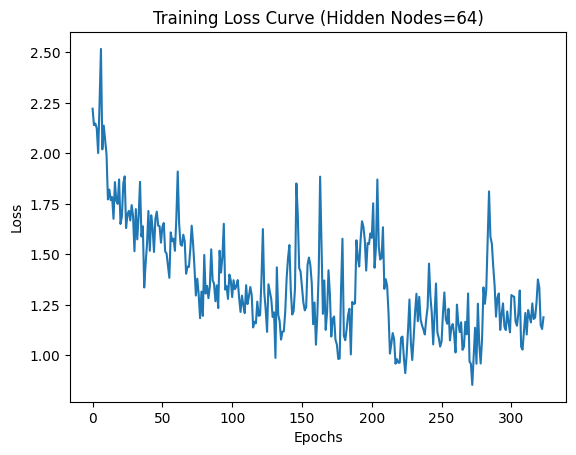

In [5]:
# Train with different numbers of hidden nodes
response = requests.get('https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff')
arff_data, meta = arff.loadarff(io.StringIO(response.text))

df = pd.DataFrame(arff_data)

df["Class"] = df["Class"].str.decode("utf-8")

df = df.drop(["Train or Test", "Speaker Number", "Sex"], axis=1)

x = df.drop(columns=["Class"])
y = df["Class"]

best_lr = 1.0

hidden_nodes_list = [1, 2, 4, 8, 16, 32, 64, 128, 256]

num_of_runs = 5
results = []

for hidden_nodes in hidden_nodes_list:
    start_time = time.time()
    run_results = []

    print(f"\nRunning Tests for Hidden Nodes = {hidden_nodes}")
    print("-" * 50)

    for i in range(num_of_runs):
        train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25)

        clf = MLPClassifier(
            hidden_layer_sizes=[hidden_nodes],
            activation='logistic',
            solver='sgd',
            alpha=0,
            batch_size=32,
            learning_rate_init=best_lr,
            shuffle=True,
            momentum=0,
            n_iter_no_change=50,
            max_iter=1000
        )

        clf.fit(train_x, train_y)

        iterations = clf.n_iter_
        train_accuracy = clf.score(train_x, train_y)
        test_accuracy = clf.score(test_x, test_y)

        print(f"Run # {i + 1}: Epochs = {iterations}, Train Acc = {train_accuracy}, Test Acc = {test_accuracy}")

        run_results.append([iterations, train_accuracy, test_accuracy])

    end_time = time.time()

    avg_iterations = np.mean([r[0] for r in run_results])
    avg_train_acc = np.mean([r[1] for r in run_results])
    avg_test_acc = np.mean([r[2] for r in run_results])

    results.append([hidden_nodes, avg_iterations, avg_train_acc, avg_test_acc])


    print(f"\nFINAL RESULTS FOR HIDDEN NODES = {hidden_nodes}")
    print(f"Time Taken: {end_time - start_time}")
    print(f"Avg Iterations: {avg_iterations}")
    print(f"Avg Train Accuracy: {avg_train_acc}")
    print(f"Avg Test Accuracy: {avg_test_acc}")
    print("-------------------------------------------------------")

print("Done")

df_results = pd.DataFrame(results, columns=["Hidden Nodes", "Avg Iterations", "Avg Train Acc", "Avg Test Acc"])

print(df_results.to_string(index=False))

best_hidden_nodes = df_results.loc[df_results["Avg Test Acc"].idxmax(), "Hidden Nodes"]
print(f"\n Best Number of Hidden Nodes: {best_hidden_nodes}")

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25)

clf = MLPClassifier(
    hidden_layer_sizes=[best_hidden_nodes],
    activation='logistic',
    solver='sgd',
    alpha=0,
    batch_size=1,
    learning_rate_init=best_lr,
    shuffle=True,
    momentum=0,
    n_iter_no_change=50,
    max_iter=1000
)

clf.fit(train_x, train_y)

plt.plot(clf.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"Training Loss Curve (Hidden Nodes={best_hidden_nodes})")
plt.show()

#### Discussion
Discuss your table and the effect of different numbers of hidden nodes on both training time and accuracy

These were some interesting results. First off, to be expected, the low number of hidden nodes (1,2,4,8) had very low accuracy along with high iterations. Hidden node values of (16,32,64) had very much improved accuracy. 64 hidden nodes did it the best with 96% accuracy in 819 iterations. 128 hidden nodes did show similiar results as 64% but no significant increase, which means that we can comfortably stop at 64 hidden nodes.

### 2.4 (10%) Momentum

Try at least 5 different momentum terms between 0 and just less than 1 using the best number of hidden nodes and LR from your earlier experiments.

- Create a table just like above, except with momentum values rather than LR or number of hidden nodes.


Momentum = 0.0
Run # 1: Epochs = 747, Train Acc = 1.0, Test Acc = 0.9758064516129032
Run # 2: Epochs = 802, Train Acc = 1.0, Test Acc = 0.9596774193548387
Run # 3: Epochs = 838, Train Acc = 1.0, Test Acc = 0.9556451612903226
Run # 4: Epochs = 789, Train Acc = 1.0, Test Acc = 0.9798387096774194
Run # 5: Epochs = 760, Train Acc = 1.0, Test Acc = 0.967741935483871

FINAL RESULTS FOR MOMENTUM = 0.0
Time Taken: 35.40010380744934
Avg Iterations: 787.2
Avg Train Accuracy: 1.0
Avg Test Accuracy: 0.967741935483871
-------------------------------------------------------

Momentum = 0.2
Run # 1: Epochs = 731, Train Acc = 1.0, Test Acc = 0.9637096774193549
Run # 2: Epochs = 644, Train Acc = 1.0, Test Acc = 0.967741935483871
Run # 3: Epochs = 695, Train Acc = 1.0, Test Acc = 0.9395161290322581
Run # 4: Epochs = 740, Train Acc = 1.0, Test Acc = 0.9435483870967742
Run # 5: Epochs = 737, Train Acc = 1.0, Test Acc = 0.9758064516129032

FINAL RESULTS FOR MOMENTUM = 0.2
Time Taken: 28.22232961654663
Avg

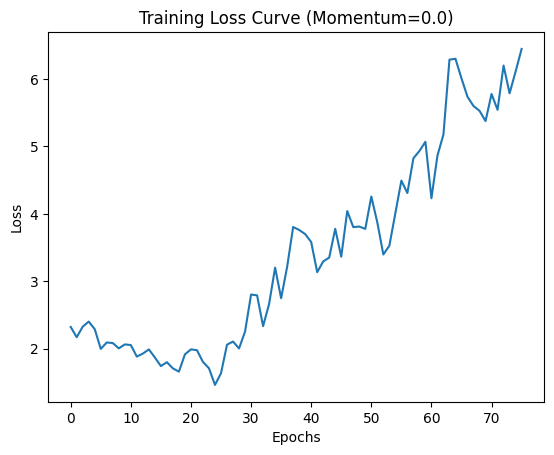

In [7]:
# Train with different momentum values
response = requests.get('https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff')
arff_data, meta = arff.loadarff(io.StringIO(response.text))

df = pd.DataFrame(arff_data)

df["Class"] = df["Class"].str.decode("utf-8")

df = df.drop(["Train or Test", "Speaker Number", "Sex"], axis=1)

x = df.drop(columns=["Class"])
y = df["Class"]

best_lr = 1.0
best_hidden_nodes = 64

momentum_values = [0.0, 0.2, 0.5, 0.7, 0.9]

num_of_runs = 5
results = []

for momentum in momentum_values:
    start_time = time.time()
    run_results = []

    print(f"\nMomentum = {momentum}")

    for i in range(num_of_runs):
        train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25)

        clf = MLPClassifier(
            hidden_layer_sizes=[best_hidden_nodes],
            activation='logistic',
            solver='sgd',
            alpha=0,
            batch_size=32,
            learning_rate_init=best_lr,
            shuffle=True,
            momentum=momentum,
            n_iter_no_change=50,
            max_iter=1000
        )

        clf.fit(train_x, train_y)

        iterations = clf.n_iter_
        train_accuracy = clf.score(train_x, train_y)
        test_accuracy = clf.score(test_x, test_y)

        print(f"Run # {i + 1}: Epochs = {iterations}, Train Acc = {train_accuracy}, Test Acc = {test_accuracy}")

        run_results.append([iterations, train_accuracy, test_accuracy])

    end_time = time.time()

    avg_iterations = np.mean([r[0] for r in run_results])
    avg_train_acc = np.mean([r[1] for r in run_results])
    avg_test_acc = np.mean([r[2] for r in run_results])

    results.append([momentum, avg_iterations, avg_train_acc, avg_test_acc])

    print(f"\nFINAL RESULTS FOR MOMENTUM = {momentum}")
    print(f"Time Taken: {end_time - start_time}")
    print(f"Avg Iterations: {avg_iterations}")
    print(f"Avg Train Accuracy: {avg_train_acc}")
    print(f"Avg Test Accuracy: {avg_test_acc}")
    print("-------------------------------------------------------")

print("Done")

df_results = pd.DataFrame(results, columns=["Momentum", "Avg Iterations", "Avg Train Acc", "Avg Test Acc"])

print(df_results.to_string(index=False))

best_momentum = df_results.loc[df_results["Avg Test Acc"].idxmax(), "Momentum"]
print(f"\nBest Momentum Value: {best_momentum}")

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25)

clf = MLPClassifier(
    hidden_layer_sizes=[best_hidden_nodes],
    activation='logistic',
    solver='sgd',
    alpha=0,
    batch_size=1,
    learning_rate_init=best_lr,
    shuffle=True,
    momentum=best_momentum,
    n_iter_no_change=50,
    max_iter=1000
)

clf.fit(train_x, train_y)

plt.plot(clf.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"Training Loss Curve (Momentum={best_momentum})")
plt.show()


#### Discussion
Discuss your table and the effect of momentum on both training time and accuracy

Momentum = 0.0 performed best with 96.8% test accuracy but took 787 iterations to converge. The higher momentum values (0.2, 0.5, 0.7)took less iterations and slightly worse accuracy, but still good (around 95%). When we increase the momentum to 0.9, the accuracy dropped significantly because we overshot. With all this being said, momentum did help speed up the training, but we have to be careful because if we increase the momentum too much, it will lead to bad accuracy. In this case, 0.7 was the best.

### 2.5 (10%) Automatic Hyperparameter Discovery
Using the vowel dataset, automatically adjust the LR, # of hidden nodes, and momentum using [grid and random search](https://scikit-learn.org/stable/modules/grid_search.html)
- For grid search include the most promising hyperparameter values you used in your experiments above.  You may add others also.
- Be patient as the grid search can take a while since it has to train all combinations of models. Don't use too many parameter options or it will be too slow.
- Report your best hyperparameters and accuracy.  Unfortunately, you will not always get as high a score as you might expect.  This is in part due to the simplicity of the dataset.  It also teaches that in gerneral you should not blindly assume that a tool will get you the results you expect, and that you may need to consider multiple approaches.

In [10]:
#Grid search for hyperparameters.
from sklearn.model_selection import GridSearchCV

response = requests.get('https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff')
arff_data, meta = arff.loadarff(io.StringIO(response.text))

df = pd.DataFrame(arff_data)

df["Class"] = df["Class"].str.decode("utf-8")

df = df.drop(["Train or Test", "Speaker Number", "Sex"], axis=1)

x = df.drop(columns=["Class"])
y = df["Class"]

parameters = {
    'learning_rate_init': [0.01, 0.1, 1.0],
    'hidden_layer_sizes': [(32,), (64,), (128,)],
    'momentum': [0.0, 0.5, 0.7]
}


clf = MLPClassifier(activation='logistic', solver='sgd', alpha=0, batch_size=32, max_iter=1000)

start_time = time.time()
grid = GridSearchCV(clf, parameters, cv=3, n_jobs=-1, verbose=2)
grid.fit(x, y)
end_time = time.time()

print(f"\nTime Taken: {end_time - start_time}")
print("\nBest Hyperparameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits

Time Taken: 419.85284304618835

Best Hyperparameters: {'hidden_layer_sizes': (64,), 'learning_rate_init': 1.0, 'momentum': 0.5}
Best Accuracy: 0.5787878787878787


In [11]:
#Randomized search for hyperparameters
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

response = requests.get('https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff')
arff_data, meta = arff.loadarff(io.StringIO(response.text))

df = pd.DataFrame(arff_data)

df["Class"] = df["Class"].str.decode("utf-8")

df = df.drop(["Train or Test", "Speaker Number", "Sex"], axis=1)

x = df.drop(columns=["Class"])
y = df["Class"]

distributions = {
    'learning_rate_init': uniform(loc=0.001, scale=1.0),
    'hidden_layer_sizes': [(8,), (16,), (32,), (64,), (128,)],
    'momentum': uniform(loc=0.0, scale=0.9)
}


clf = MLPClassifier(activation='logistic', solver='sgd', alpha=0, batch_size=32, max_iter=1000)

start_time = time.time()
search = RandomizedSearchCV(clf, distributions, n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)
search.fit(x, y)
end_time = time.time()

print(f"\nTime Taken: {end_time - start_time}")
print("\nBest Hyperparameters:", search.best_params_)
print("Best Accuracy:", search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Time Taken: 110.34106540679932

Best Hyperparameters: {'hidden_layer_sizes': (32,), 'learning_rate_init': 0.38346199126716274, 'momentum': 0.8849077972261093}
Best Accuracy: 0.5777777777777778


#### Discussion
Write about and compare grid and randomized parameter search. How much time do they take? Which is more efficient or accurate? When should you use each?

Overall, for this dataset in specific, they both produced accuracy of about 58%, but the Grid Search took substantially longer to complete taking it 420 seconds compared to the 110 seconds from the Randomized Search. Since Grid Search systematically tests all possible combinations of hyperparams, I believe this is the safer option for most datasets, even though it may take a little bit longer.

## 3 Regression with MLPs

### 3.1 (10%) - Learn a regression data set of your choice

Train MLP on any real world data set that requires regression (i.e. has a real valued ouput) and discuss your effort and results.  While the [Irvine ML Repository](https://archive.ics.uci.edu) is a great resource, also onsider [Kaggle](https://www.kaggle.com) and [OpenML](https://openml.org) as other great places to find datasets.
- Use [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) rather than MLPclassifier.  It has almost the exact same setup as MLPClassier except it uses the linear activation function for the output nodes and SSE as the loss function.  MLPClassier uses softmax activation for the output nodes and cross-entropy for the loss function.
- Use any reasonable hyperparameters that you want.  
- You will probably need to normalize input features.
- It is not typically necessary to normalize the output.
- Split into train and test and report the training and test set MAEs (Mean Absolute Error). For regression problems where we don't normalize the output, MAE is an intuitive measure as it shows exactly how much our output is off on average.

In [17]:
# Load and Learn a real world regression data set
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

data = fetch_california_housing()
x = data.data
y = data.target # Median home values


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


mlp = MLPRegressor(hidden_layer_sizes=(64, 64),
                   activation='relu',
                   solver='adam',
                   alpha=0.01,
                   learning_rate_init=0.01,
                   max_iter=1000,
                   random_state=42
                   )

mlp.fit(x_train, y_train)

y_train_pred = mlp.predict(x_train)
y_test_pred = mlp.predict(x_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Train MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Train MAE: 0.3476
Test MAE: 0.3649


#### Discussion
Report on your choice of data set and your results. How does the MLPRegressor differ from the MLPClassifier? What are their respective uses? What lessons from above did you use?

I used the California Housing Dataset from sklearn. We can use categories, for instance...
 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup' in order to predict the median home price. The MLPRegressor got a MAE for training of 0.3476 and a MAE for testing of 0.3649.

 The biggest difference is that we took more of a deep learning approach: we used a relu (which is pretty common among deep learning projects), normalized the data, and used Adam to optimize.

 The lesson that I learned is that I can use deep learning tactics for problems that involve regression.

### 3.2 (10%) - Other MLP Hyperparameters
With the same data set, you may (not required) experiment with some of the hyperparameters you already did above (LR, hidden nodes, momentum, validation set parameters, regularization).  But for sure experiment with and discuss the results of the first two hyperparameters below (activation functions and multiple hidden layers).  We encourage you to experiment briefly with the others but they are not required.

- different hidden layer activation functions (tanh, relu in addition to logistic) - Note that Sklearn does not currently let you choose the output layer activation function.  It is automatically softmax for classification and linear for regression.
- more than one hidden layer
- solver - try adam and lbfgs in addition to sgd
- batch size
- learning rate adaptation - this is the schedule parameter which lets LR adapt during learning

In [6]:
# Run with different hyperparameters
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


activations = ['relu', 'tanh']
hidden_layers = [(64,), (64, 64)]
solvers = ['adam']
batch_sizes = [32, 128]
learning_rates = ['constant', 'adaptive']

results = []

for activation in activations:
    for hidden_layer in hidden_layers:
        for solver in solvers:
            for batch_size in batch_sizes:
                for lr_schedule in learning_rates:
                    start_time = time.time()

                    mlp = MLPRegressor(
                        hidden_layer_sizes=hidden_layer,
                        activation=activation,
                        solver=solver,
                        alpha=0.01,
                        batch_size=batch_size,
                        learning_rate=lr_schedule,
                        max_iter=1000,
                        random_state=42,
                    )

                    mlp.fit(X_train, y_train)

                    y_train_pred = mlp.predict(X_train)
                    y_test_pred = mlp.predict(X_test)

                    train_mae = mean_absolute_error(y_train, y_train_pred)
                    test_mae = mean_absolute_error(y_test, y_test_pred)

                    end_time = time.time()
                    runtime = end_time - start_time

                    results.append([
                        activation, hidden_layer, solver, batch_size, lr_schedule,
                        train_mae, test_mae, runtime
                    ])
                    print(f"Act: {activation}, Layers: {hidden_layer}, Solver: {solver}, "
                    f"Batch: {batch_size}, LR: {lr_schedule}, "
                    f"Train MAE: {int(train_mae)}, Test MAE: {int(test_mae)}, Time: {int(runtime)}s")


df_results = pd.DataFrame(results, columns=["Activation", "Hidden Layers", "Solver", "Batch Size", "LR Schedule","Train MAE", "Test MAE", "Runtime" ])

df_results

Act: relu, Layers: (64,), Solver: adam, Batch: 32, LR: constant, Train MAE: 0, Test MAE: 0, Time: 12s
Act: relu, Layers: (64,), Solver: adam, Batch: 32, LR: adaptive, Train MAE: 0, Test MAE: 0, Time: 15s
Act: relu, Layers: (64,), Solver: adam, Batch: 128, LR: constant, Train MAE: 0, Test MAE: 0, Time: 9s
Act: relu, Layers: (64,), Solver: adam, Batch: 128, LR: adaptive, Train MAE: 0, Test MAE: 0, Time: 8s
Act: relu, Layers: (64, 64), Solver: adam, Batch: 32, LR: constant, Train MAE: 0, Test MAE: 0, Time: 58s
Act: relu, Layers: (64, 64), Solver: adam, Batch: 32, LR: adaptive, Train MAE: 0, Test MAE: 0, Time: 56s
Act: relu, Layers: (64, 64), Solver: adam, Batch: 128, LR: constant, Train MAE: 0, Test MAE: 0, Time: 24s
Act: relu, Layers: (64, 64), Solver: adam, Batch: 128, LR: adaptive, Train MAE: 0, Test MAE: 0, Time: 24s
Act: tanh, Layers: (64,), Solver: adam, Batch: 32, LR: constant, Train MAE: 0, Test MAE: 0, Time: 33s
Act: tanh, Layers: (64,), Solver: adam, Batch: 32, LR: adaptive, Tra

,Activation,Hidden Layers,Solver,Batch Size,LR Schedule,Train MAE,Test MAE,Runtime
0,relu,"(64,)",adam,32,constant,0.371560,0.381005,12.713017
1,relu,"(64,)",adam,32,adaptive,0.371560,0.381005,15.269190
2,relu,"(64,)",adam,128,constant,0.367581,0.378481,9.268801
3,relu,"(64,)",adam,128,adaptive,0.367581,0.378481,8.015243
4,relu,"(64, 64)",adam,32,constant,0.334578,0.350931,58.357238
5,relu,"(64, 64)",adam,32,adaptive,0.334578,0.350931,56.518901
6,relu,"(64, 64)",adam,128,constant,0.320026,0.342505,24.464443
7,relu,"(64, 64)",adam,128,adaptive,0.320026,0.342505,24.504831
8,tanh,"(64,)",adam,32,constant,0.385628,0.396553,33.434472
9,tanh,"(64,)",adam,32,adaptive,0.385628,0.396553,34.368063


#### Discussion
How do the hyperparameters affect your accuracy? Specifically the number of layers and nodes and activation functions you experimented with. Do the solver, batch size, and learning rate adaptation affect anything?


- On avg. the ReLU activation performed slightly better than Tanh.
- Adding an extra hidden layer improved accuracy, but not too much in a dramatic way.
- Larger batch sizes did train way faster.

Overall, the best balance between accuracy and speed was the ReLU, (64,64) layers, Adam solver, batch size 128, and constant LR.

## 4. (Optional 20% extra credit) Code up your own MLP/Backprop learner
Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Ability to create a network structure with at least one hidden layer and an arbitrary number of nodes. You may choose just one non-linear activation function for all hidden and output nodes if you want (e.g. sigmoid activation function where the loss is SSE rather than cross-entropy).
- Random weight initialization with small random weights with 0 mean. Remember that every hidden and output node should have its own bias weight.
- Use stochastic training updates: update weights after each training instance (i.e. not batch)
- Option to include a momentum term
- Your class can inherit from the relevant scikit-learn learners (e.g. data shuffling, etc.), but don't call any of the super methods to accomplish the core methods in the scaffold.
- Run the Iris data set above with your Backprop version. Show and discuss your results and how they compare with the sklearn version.
- Coding MLP is a good experience but is a little more challening than implementing other models so the extra credit points are higher than typical.

*Discuss your results and any differences*

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MLP(BaseEstimator,ClassifierMixin):

    def __init__(self,lr=.1, momentum=0, shuffle=True,hidden_layer_widths=None):
        """ Initialize class with chosen hyperparameters.

        Args:
            lr (float): A learning rate / step size.
            shuffle(boolean): Whether to shuffle the training data each epoch. DO NOT SHUFFLE for evaluation / debug datasets.
            momentum(float): The momentum coefficent
        Optional Args (Args we think will make your life easier):
            hidden_layer_widths (list(int)): A list of integers which defines the width of each hidden layer if hidden layer is none do twice as many hidden nodes as input nodes. (and then one more for the bias node)
            For example: input width 1, then hidden layer will be 3 nodes
        Example:
            mlp = MLP(lr=.2,momentum=.5,shuffle=False,hidden_layer_widths = [3,3]),  <--- this will create a model with two hidden layers, both 3 nodes wide
        """
        self.hidden_layer_widths
        self.lr = lr
        self.momentum = momentum
        self.shuffle = shuffle


    def fit(self, X, y, initial_weights=None):
        """ Fit the data; run the algorithm and adjust the weights to find a good solution

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 2D numpy array with the training targets
        Optional Args (Args we think will make your life easier):
            initial_weights (array-like): allows the user to provide initial weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)

        """
        self.weights = self.initialize_weights() if not initial_weights else initial_weights

        return self

    def predict(self, X):
        """ Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass

    def initialize_weights(self):
        """ Initialize weights for perceptron. Don't forget the bias!

        Returns:

        """

        return [0]

    def score(self, X, y):
        """ Return accuracy of model on a given dataset. Must implement own score function.

        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets

        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """

        return 0

    ###  Returns the weights. Not required but helpful for debugging
    def get_weights(self):
        pass
